In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Đọc dữ liệu

In [ ]:
data_path = r"D:\NEU\Data Storytelling\Global Cyber Threats.xlsx"
df = pd.read_excel(data_path)

df.shape


(3000, 10)

Kiểm tra missing values và kiểu dữ liệu 

In [3]:
def check_missing_and_types(df):
    missing_summary = df.isnull().sum().reset_index()
    missing_summary.columns = ['Column', 'Missing Count']
    missing_summary['Missing %'] = (missing_summary['Missing Count'] / len(df)) * 100
    dtypes_summary = df.dtypes.reset_index()
    dtypes_summary.columns = ['Column', 'Data Type']
    return pd.merge(missing_summary, dtypes_summary, on='Column')

# Kiểm tra missing + kiểu dữ liệu
summary_missing_types = check_missing_and_types(df)
print(">> MISSING VALUE & DATA TYPE SUMMARY:")
print(summary_missing_types)


>> MISSING VALUE & DATA TYPE SUMMARY:
                                Column  Missing Count  Missing % Data Type
0                              Country              0        0.0    object
1                                 Year              0        0.0     int64
2                          Attack Type              0        0.0    object
3                      Target Industry              0        0.0    object
4        Financial Loss (in Million $)              0        0.0   float64
5             Number of Affected Users              0        0.0     int64
6                        Attack Source              0        0.0    object
7          Security Vulnerability Type              0        0.0    object
8               Defense Mechanism Used              0        0.0    object
9  Incident Resolution Time (in Hours)              0        0.0     int64


Kiểm tra outlier

C:\Users\Admin\AppData\Local\Temp\ipykernel_5908\2709750626.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data_to_plot, patch_artist=True, labels=['Financial Loss ($M)', 'Resolution Time (Hours)'])


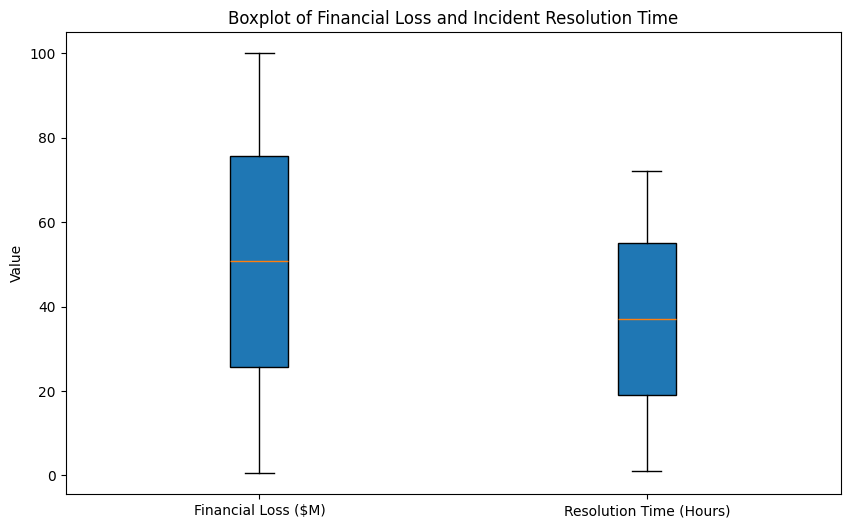

In [5]:
data_to_plot = [
    df['Financial Loss (in Million $)'].dropna(),
    df['Incident Resolution Time (in Hours)'].dropna()
]

# Tạo biểu đồ
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(data_to_plot, patch_artist=True, labels=['Financial Loss ($M)', 'Resolution Time (Hours)'])
ax.set_title('Boxplot of Financial Loss and Incident Resolution Time')
ax.set_ylabel('Value')
plt.show()


Kiểm tra phân phối từng giá trị

In [7]:
for col in df.select_dtypes(include='object').columns:
    print(f"\n>> Phân phối cột: {col}")
    print(df[col].value_counts(normalize=True).head(5) * 100)



>> Phân phối cột: Country
Country
UK        10.700000
Brazil    10.333333
India     10.266667
Japan     10.166667
France    10.166667
Name: proportion, dtype: float64

>> Phân phối cột: Attack Type
Attack Type
DDoS             17.700000
Phishing         17.633333
SQL Injection    16.766667
Ransomware       16.433333
Malware          16.166667
Name: proportion, dtype: float64

>> Phân phối cột: Target Industry
Target Industry
IT            15.933333
Banking       14.833333
Healthcare    14.300000
Retail        14.100000
Education     13.966667
Name: proportion, dtype: float64

>> Phân phối cột: Attack Source
Attack Source
Nation-state    26.466667
Unknown         25.600000
Insider         25.066667
Hacker Group    22.866667
Name: proportion, dtype: float64

>> Phân phối cột: Security Vulnerability Type
Security Vulnerability Type
Zero-day              26.166667
Social Engineering    24.900000
Unpatched Software    24.600000
Weak Passwords        24.333333
Name: proportion, dtype: float